# Week4 - Lab

Take a look at this toy dataset. Perform the following operations
* Train-test split
* Train a linear regression model
* Evaluate/create residual plots
* Explain findings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

data1 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_1.csv')
data2 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_2.csv')

In [2]:
from sklearn.linear_model import LinearRegression

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [3]:
data1.head()

,Unnamed: 0,X,y
0,0,50,147
1,1,82,246
2,2,66,207
3,3,35,105
4,4,81,240


In [4]:
data1 = data1.set_index('Unnamed: 0').rename_axis('Index')

In [5]:
data1.head()

,X,y
Index,,
0,50,147
1,82,246
2,66,207
3,35,105
4,81,240


In [6]:
data2.head()

,Unnamed: 0,X1,X2,y
0,0,50,B,2510
1,1,82,B,6738
2,2,66,B,4355
3,3,35,A,2225
4,4,81,A,7560


In [7]:
data2 = data2.set_index('Unnamed: 0').rename_axis('Index')

In [8]:
data2.head()

,X1,X2,y
Index,,,
0,50,B,2510
1,82,B,6738
2,66,B,4355
3,35,A,2225
4,81,A,7560


### Train-test split

In [10]:
from sklearn.model_selection import train_test_split

features1 = [x for x in data1.columns if x != 'y']

X1 = data1[features1]
y1 = data1['y']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=100)

print(f'Records in training data1: {X1_train.shape[0]:,}')
print(f'Records in test data1: {X1_test.shape[0]:,}')
print('\nFeatures in data1:')
print(*X1_train.columns, sep='\n')

Records in training data1: 80
Records in test data1: 20

Features in data1:
X


In [11]:
features2 = [x for x in data2.columns if x != 'y']

X2 = data2[features2]
y2 = data2['y']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=100)

print(f'Records in training data: {X2_train.shape[0]:,}')
print(f'Records in test data: {X2_test.shape[0]:,}')
print('\nFeatures in data2:')
print(*X2_train.columns, sep='\n')

Records in training data: 80
Records in test data: 20

Features in data2:
X1
X2


### Train a linear regression model

In [12]:
num_vars1=features1
num_pipeline1 = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])
processing_pipeline1 = ColumnTransformer(transformers=[('proc_numeric', num_pipeline1, num_vars1)])

modeling_pipeline1 = Pipeline([('data_processing', processing_pipeline1), 
                              ('lm', LinearRegression())
                             ])
modeling_pipeline1.fit(X1_train, y1_train)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['X'])])),
                ('lm', LinearRegression())])

In [16]:
num_vars2 = ['X1']
cat_vars2 = ['X2']

num_pipeline2 = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])

cat_pipeline2 = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

processing_pipeline2 = ColumnTransformer(transformers=[('proc_numeric', num_pipeline2, num_vars2),
                                                      ('create_dummies', cat_pipeline2, cat_vars2)])


modeling_pipeline2 = Pipeline([('data_processing', processing_pipeline2), 
                              ('lm', LinearRegression())
                             ])

modeling_pipeline2.fit(X2_train, y2_train)


Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['X1']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                          

### Evaluate/create residual plots

In [18]:
y1_pred = modeling_pipeline1.predict(X1_test)
y2_pred = modeling_pipeline2.predict(X2_test)

In [20]:
from sklearn.metrics import r2_score
r2_1 = r2_score(y1_test, y1_pred)
r2_2 = r2_score(y2_test, y2_pred)

In [21]:
print(f'r2 for data1 is {r2_1}')
print(f'r2 for data2 is {r2_2}')

r2 for data1 is 0.9872328017796749
r2 for data2 is 0.876847136426577


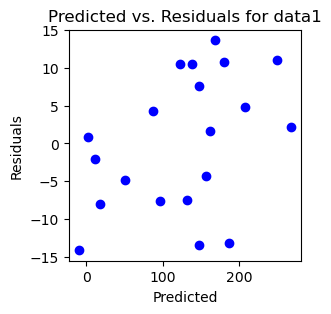

In [26]:
plt.figure(figsize=(3,3))
plt.plot(y1_test, y1_test-y1_pred, 'bo')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Predicted vs. Residuals for data1')
plt.show()

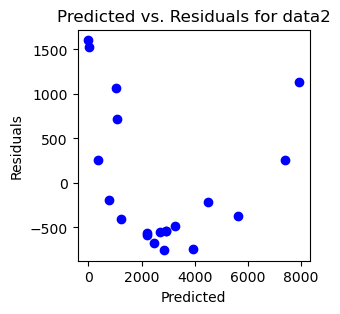

In [27]:
plt.figure(figsize=(3,3))
plt.plot(y2_test, y2_test-y2_pred, 'bo')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Predicted vs. Residuals for data2')
plt.show()

### Explain findings

Essentially, an R-Squared value of 0.9 would indicate that 90% of the variance of the dependent variable being studied is 
explained by the variance of the independent variable. Since the variance observed in one dataset is not similar to that found in others, R-Squared cannot be used to compare the above two models.

For data1, the In this residual plot, the points are scattered randomly around the residual=0 line. We can conclude that a linear model is appropriate for modeling this data.Wheras for data2, the data points form a curved pattern, a U-shaped pattern. Since there is a detectable pattern in the residual plot, we conclude that a linear model is not a right fit for the data.